<a href="https://colab.research.google.com/github/RahulI5/Mobile-Price-Range-Prediction/blob/main/Supervised_ML_Capstone_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(e.g:- RAM, Internal Memory, etc) and its selling price, in the problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import seaborn as sns


from scipy import stats 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgbm

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/ML Capstone Project- Classification/data_mobile_price_range.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




### Dataset First View

In [ ]:
# Dataset First Look
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print("The number of unique values in column",i,"is",df[i].nunique())

The number of unique values in column battery_power is 1094
The number of unique values in column blue is 2
The number of unique values in column clock_speed is 26
The number of unique values in column dual_sim is 2
The number of unique values in column fc is 20
The number of unique values in column four_g is 2
The number of unique values in column int_memory is 63
The number of unique values in column m_dep is 10
The number of unique values in column mobile_wt is 121
The number of unique values in column n_cores is 8
The number of unique values in column pc is 21
The number of unique values in column px_height is 1137
The number of unique values in column px_width is 1109
The number of unique values in column ram is 1562
The number of unique values in column sc_h is 15
The number of unique values in column sc_w is 19
The number of unique values in column talk_time is 19
The number of unique values in column three_g is 2
The number of unique values in column touch_screen is 2
The numbe

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# show value counts
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
# Mobile phones groupby 3g, 4g and not supports
Four_g = df.groupby('four_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)
Three_g = df.groupby('three_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

In [ ]:
print(Four_g)
print(Three_g) 

   four_g  price_range  Count
4       1            3    275
5       1            1    262
6       1            0    259
0       0            2    253
7       1            2    247
1       0            0    241
2       0            1    238
3       0            3    225
   three_g  price_range  Count
4        1            2    387
5        1            3    385
6        1            1    378
7        1            0    373
0        0            0    127
1        0            1    122
2        0            3    115
3        0            2    113


In [ ]:
# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 21 numerical variables
There are 0 categorical variables


In [ ]:
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

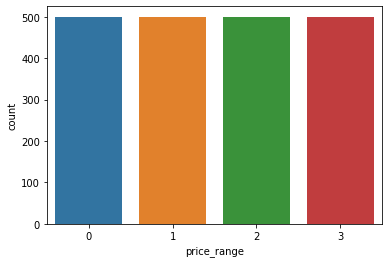

In [ ]:
# Chart - 1 visualization code
sns.countplot(df['price_range'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

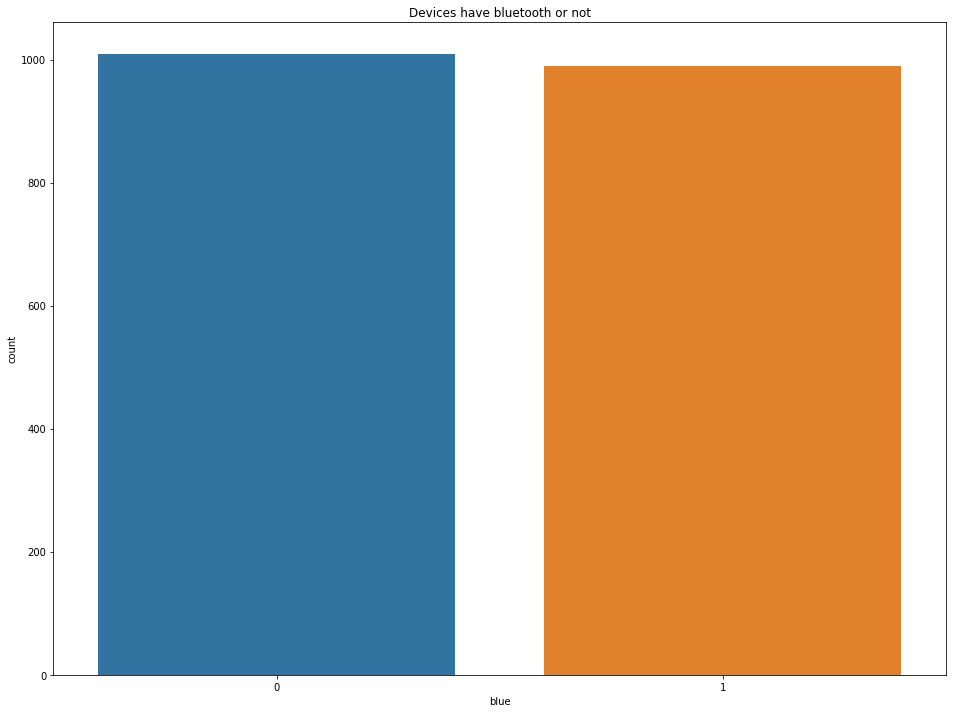

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = [16,12])
sns.countplot(df['blue'],data=df)
plt.title('Devices have bluetooth or not')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

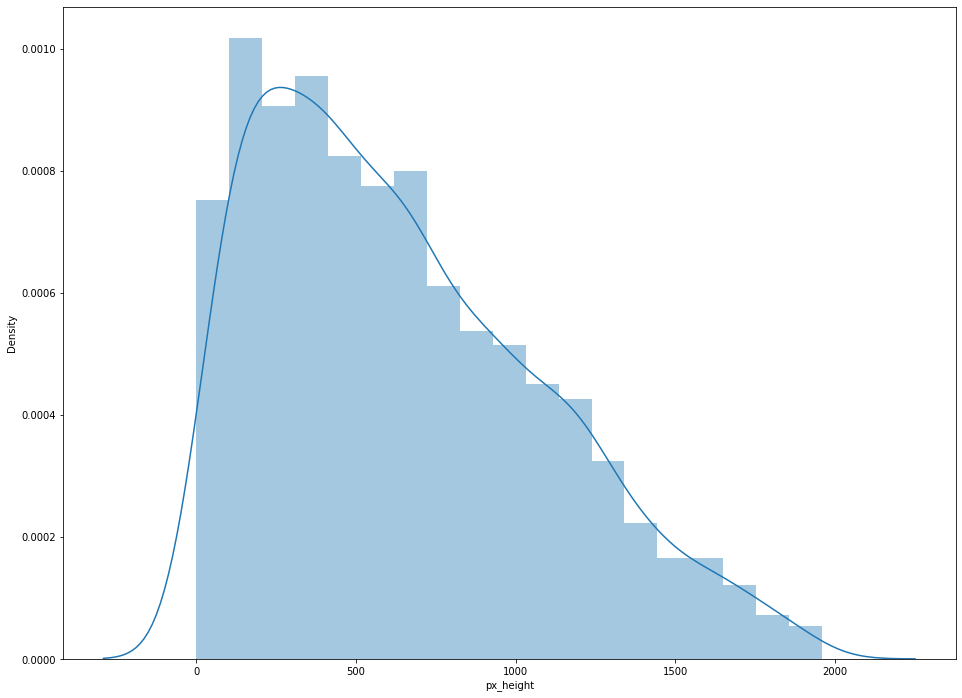

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = [16,12])
sns.distplot(df['px_height'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

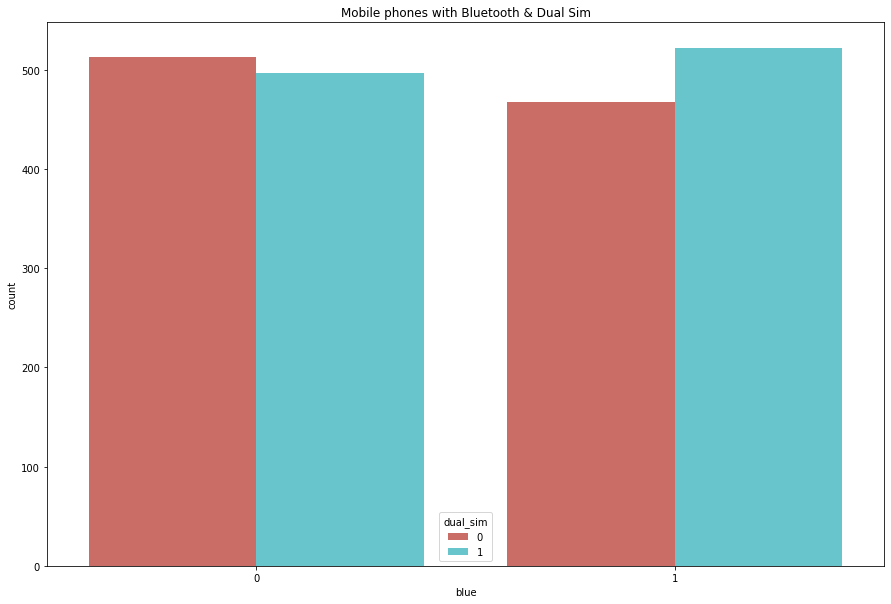

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (15,10))
plt.title('Mobile phones with Bluetooth & Dual Sim')
sns.countplot(df['blue'], hue= df['dual_sim'], palette = 'hls')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

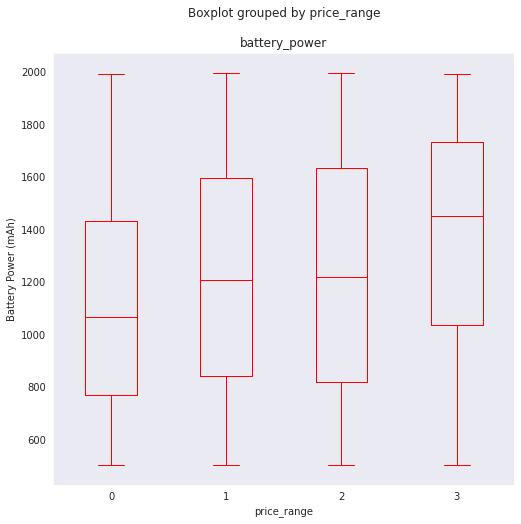

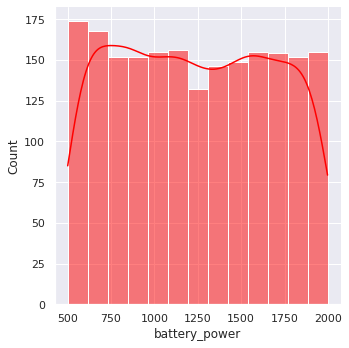

In [ ]:
# Chart - 5 visualization code
# Checked whether Battery Power be affected in mobile Price?? and how the battery mAh is spread

from mmap import MAP_PRIVATE

sns.set_style("darkgrid")
df.boxplot(by ='price_range', column =['battery_power'], grid = False,figsize=(8,8),color='red'),
plt.ylabel("Battery Power (mAh)")

sns.set(rc={'figure.figsize':(8,8)})
ax=sns.displot(data=df["battery_power"],kde=True,color='red')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Function to plot the distribution of the Categorical feature for each price range 
def plot_price_range(column_name):
  fig, axs = plt.subplots(1,4, figsize=(20,6))
  for i in range(4):
    sns.countplot(x=df[df['price_range']==i][column_name] , ax=axs[i])
    axs[i].set_xlabel(f'{column_name} category')
    axs[i].set_xlabel(f'for price_range = {i}')

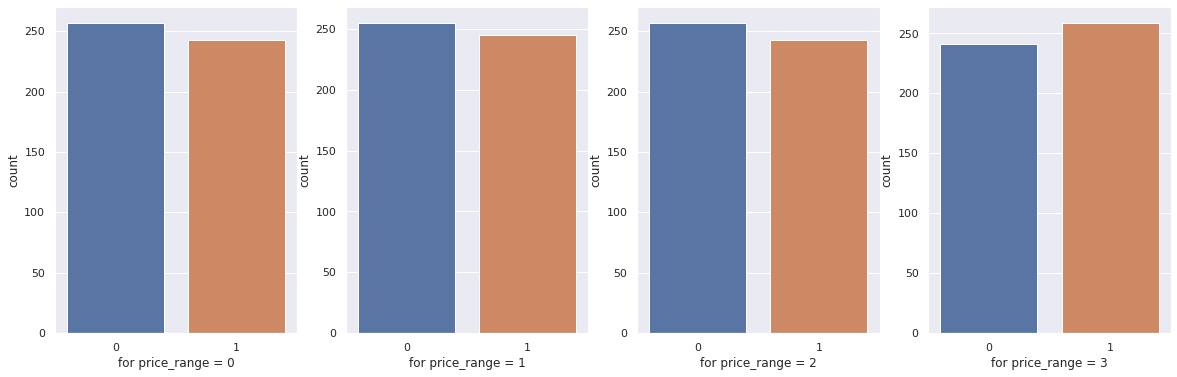

In [ ]:
plot_price_range('blue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
num_columns = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

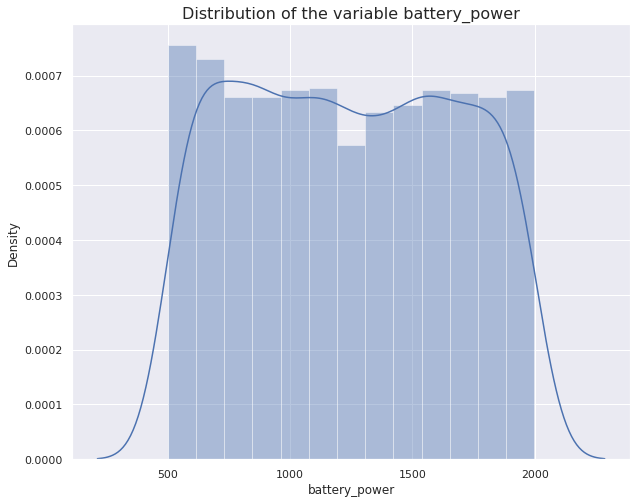

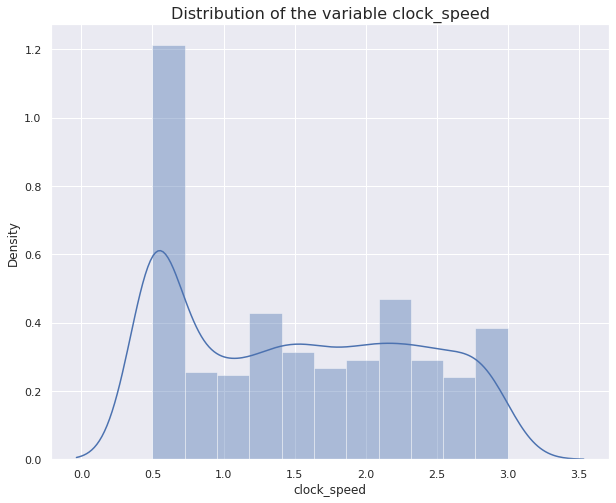

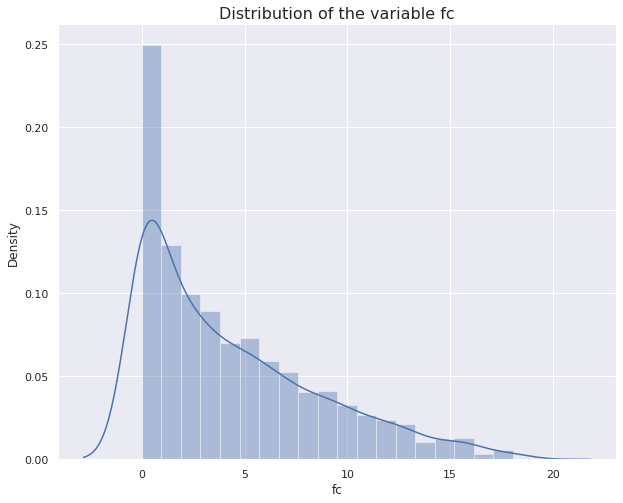

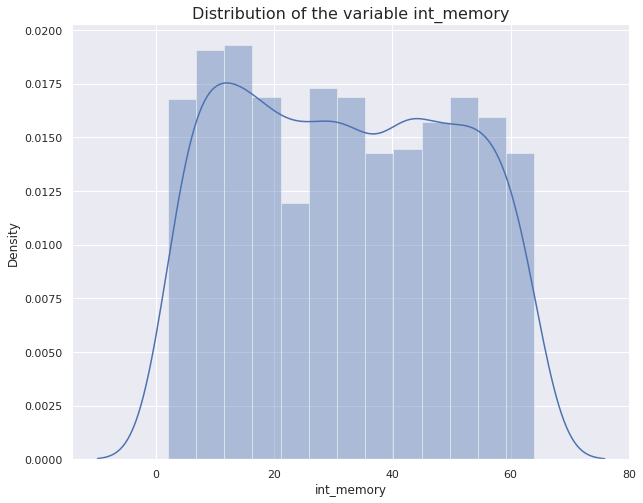

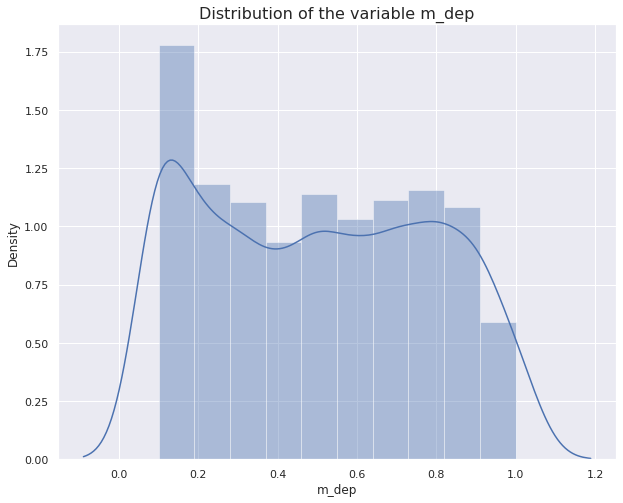

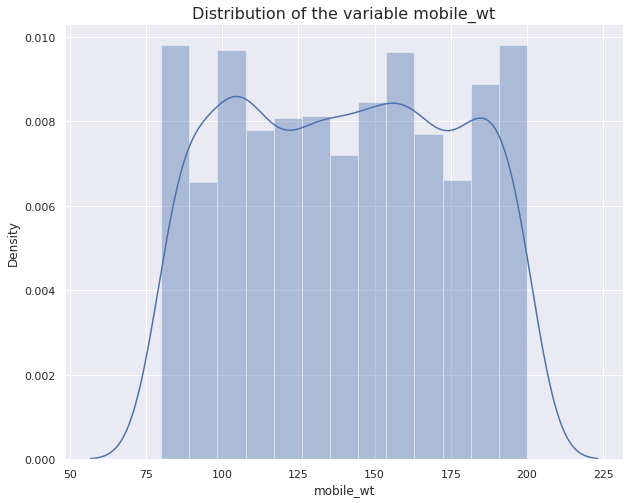

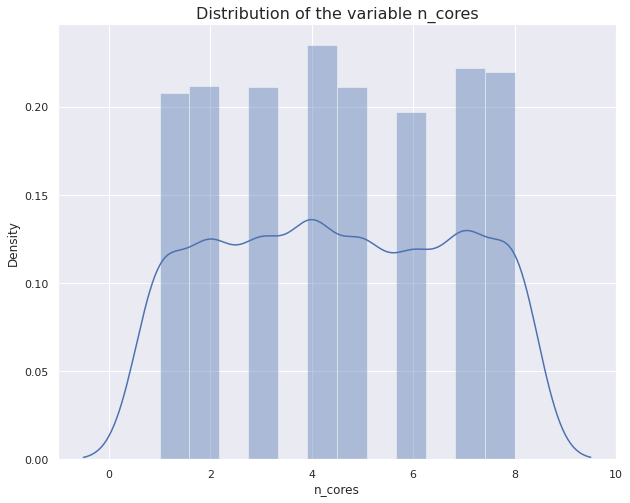

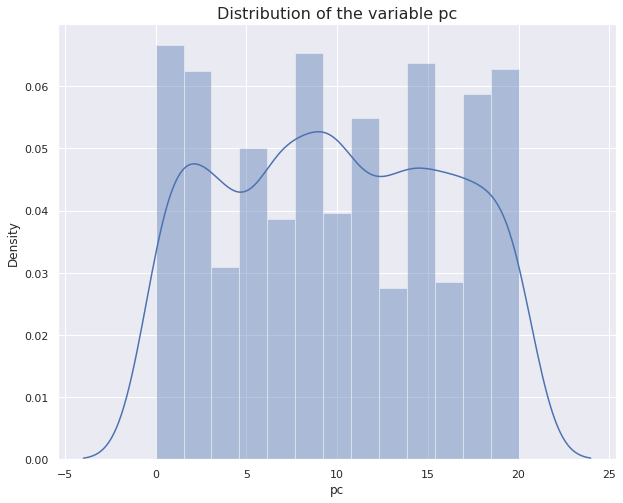

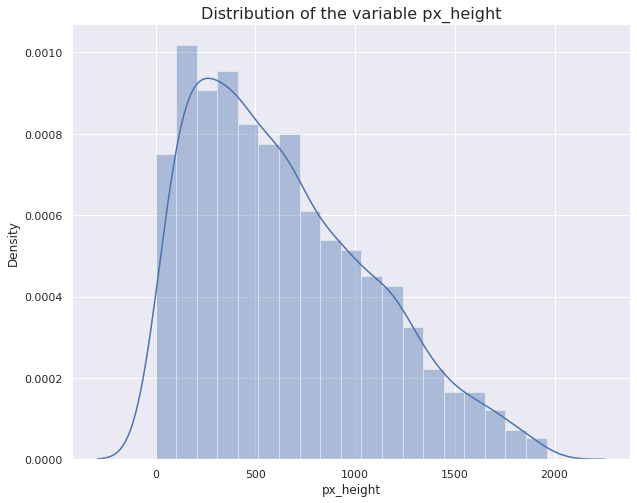

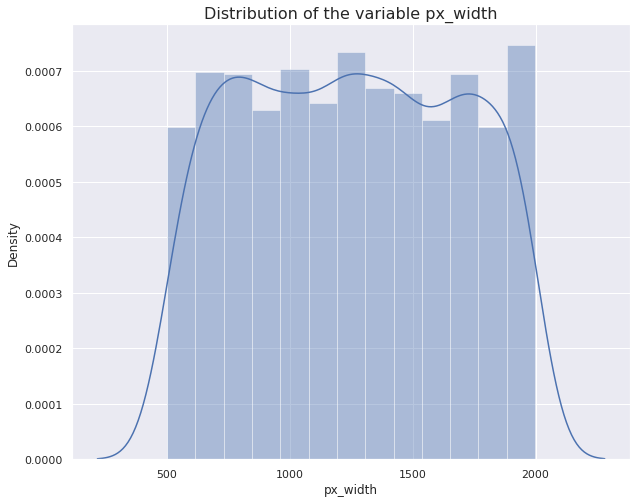

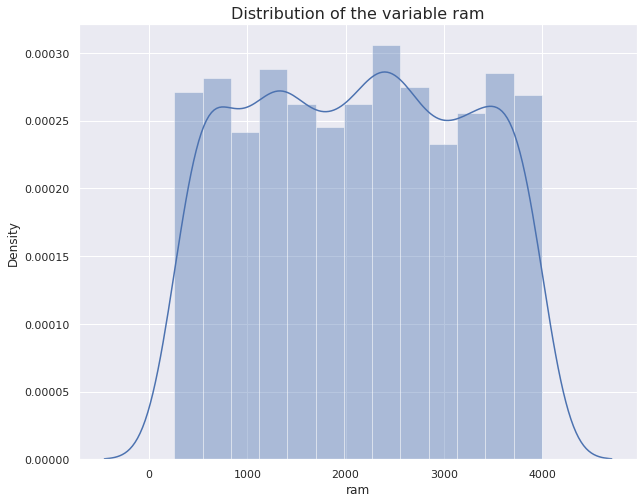

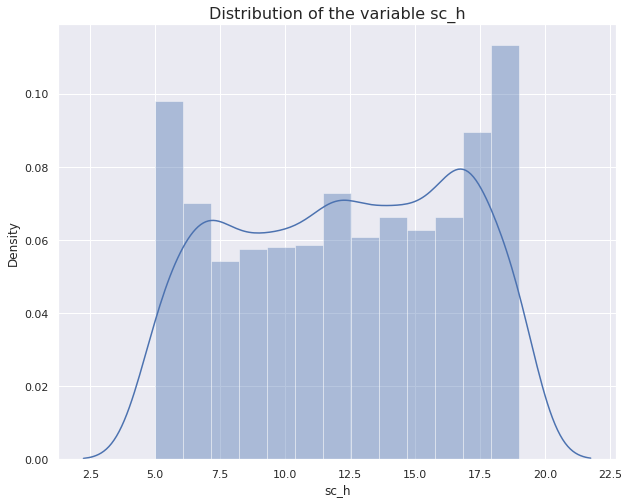

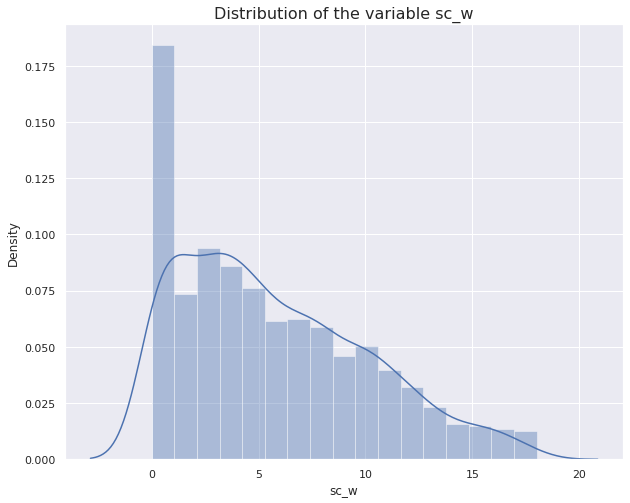

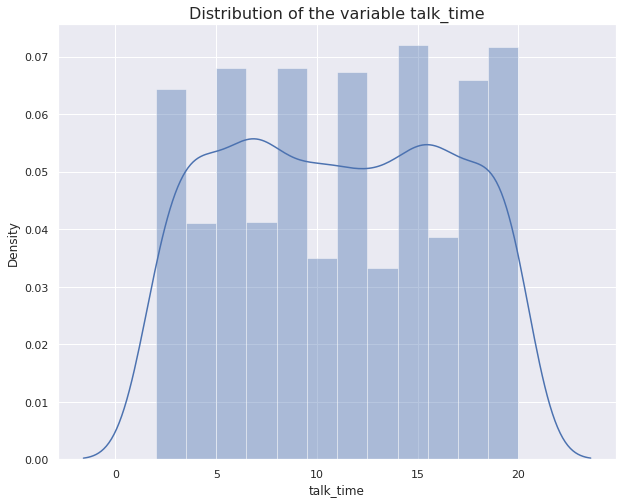

In [ ]:
# Plotted the distribution of Numerical Features.
for col in num_columns:
  sns.set(rc={'figure.figsize':(10,8)})
  sns.set_color_codes('pastel')
  sns.distplot(df[col])
  plt.title(f"Distribution of the variable {col}", fontsize=16)
  plt.xlabel(f"{col}")
  plt.ylabel("Density")
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

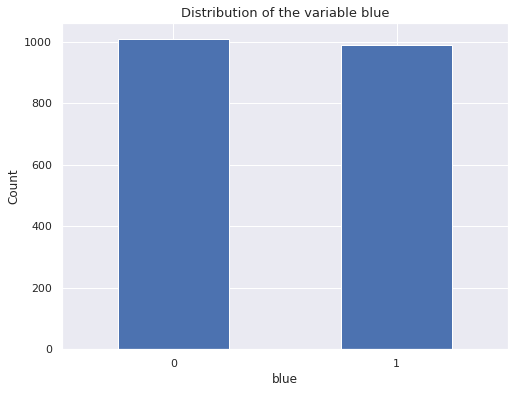

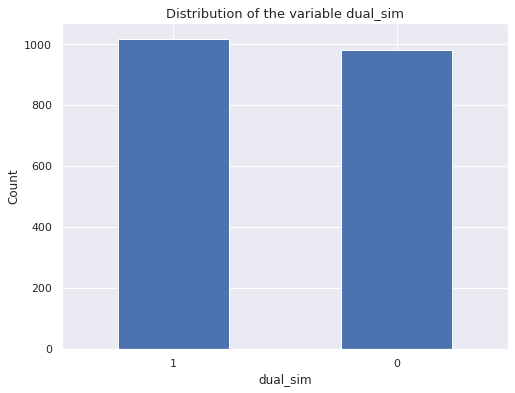

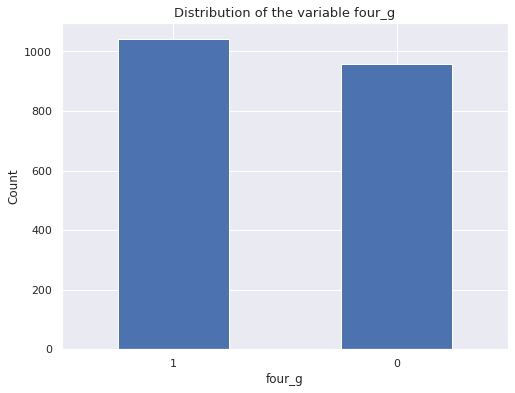

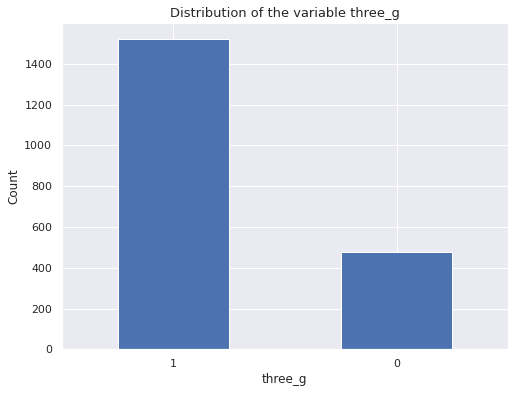

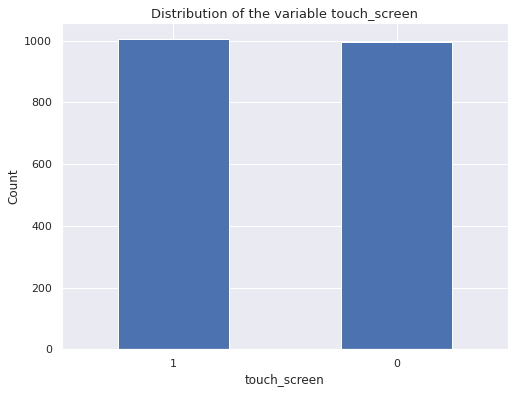

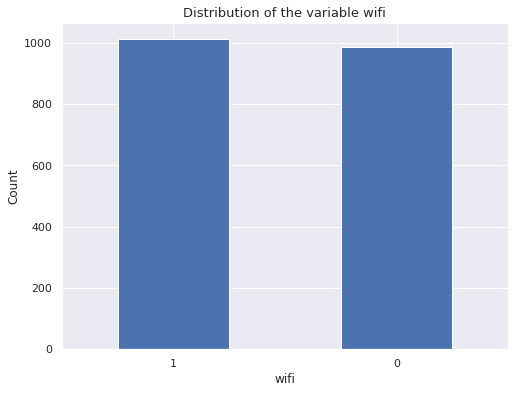

In [ ]:
# Chart - 8 visualization code
category_columns = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
chart = sns.set(rc={'figure.figsize':(8,6)})
for col in category_columns:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Distribution of the variable {col}",fontsize=13)
  plt.xlabel(f"{col}")
  plt.xticks(rotation=0)
  plt.ylabel("Count")
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

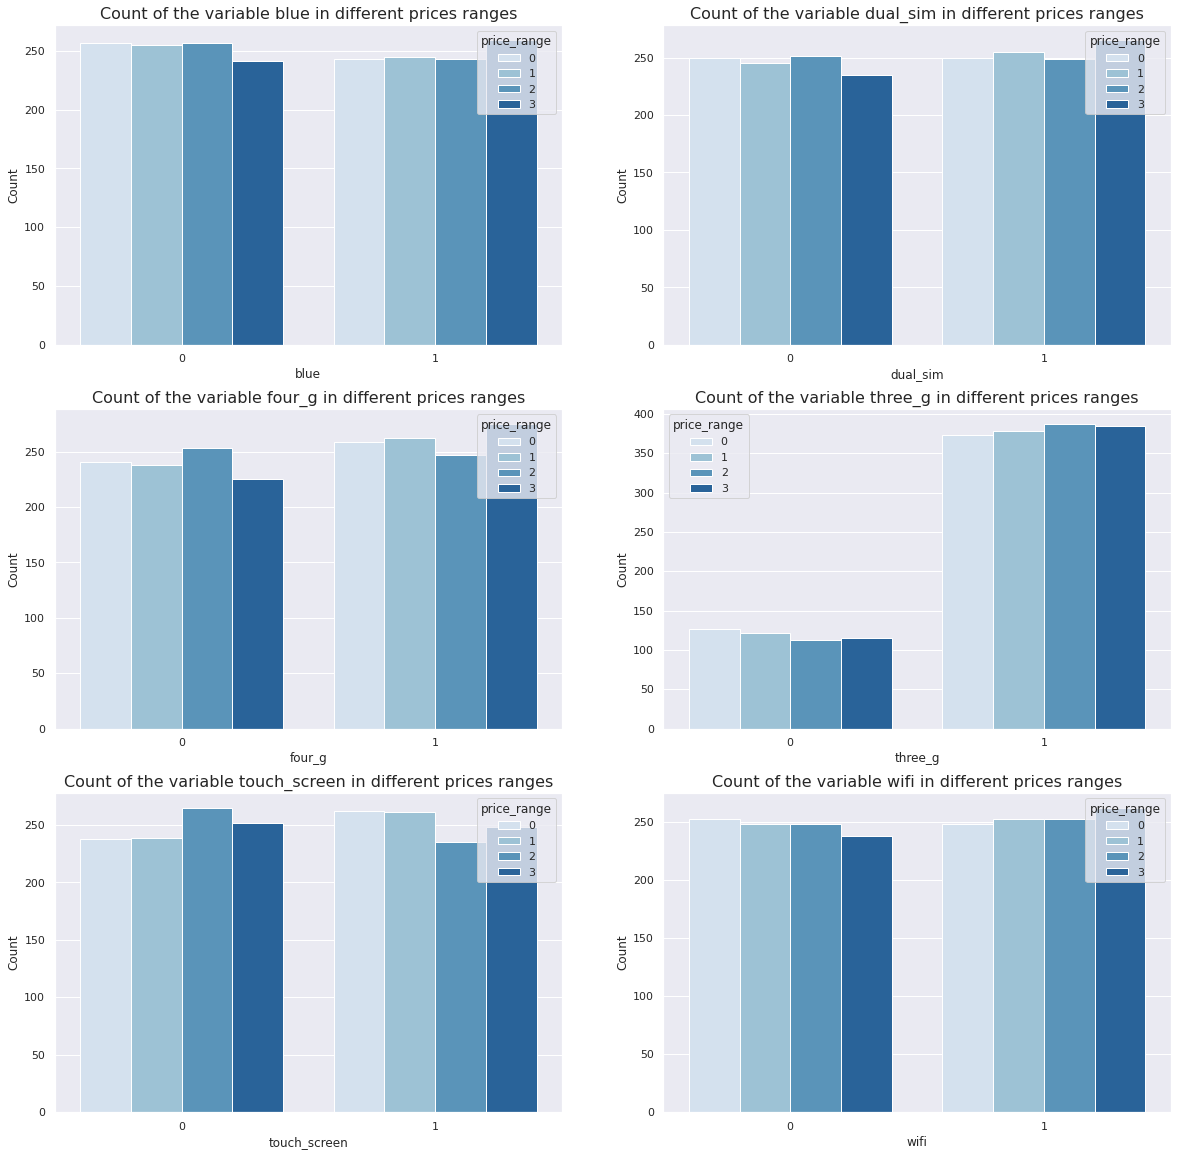

In [ ]:
# Chart - 9 visualization code
count = 1
plt.subplots(figsize=(20,20))
for col in category_columns:
  plt.subplot(3,2,count)
  sns.countplot(df[col], hue=df['price_range'], palette='Blues')
  
  plt.title(f"Count of the variable {col} in different prices ranges", fontsize=16)
  plt.xlabel(f"{col}")
  plt.ylabel("Count")
  count += 1

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

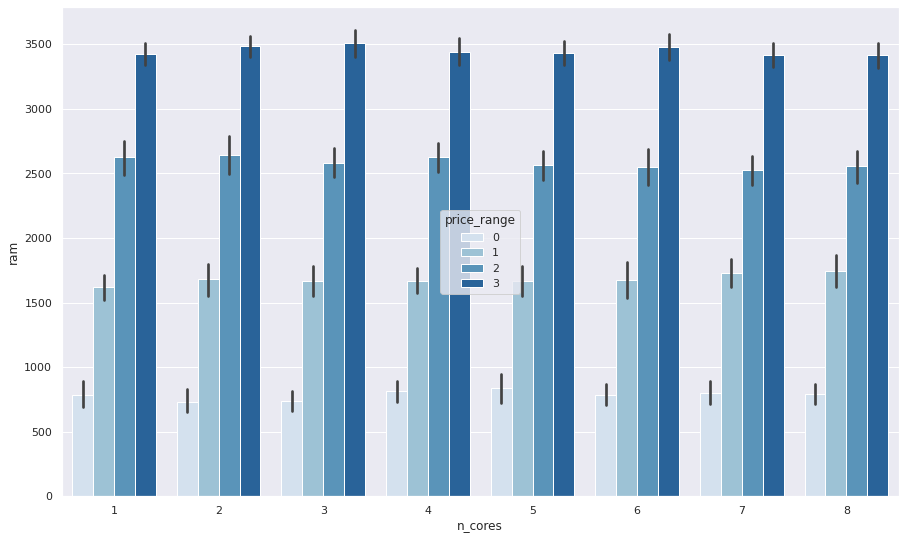

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(15,9))
sns.barplot(x='n_cores',y='ram',hue='price_range', data=df, palette= 'Blues')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

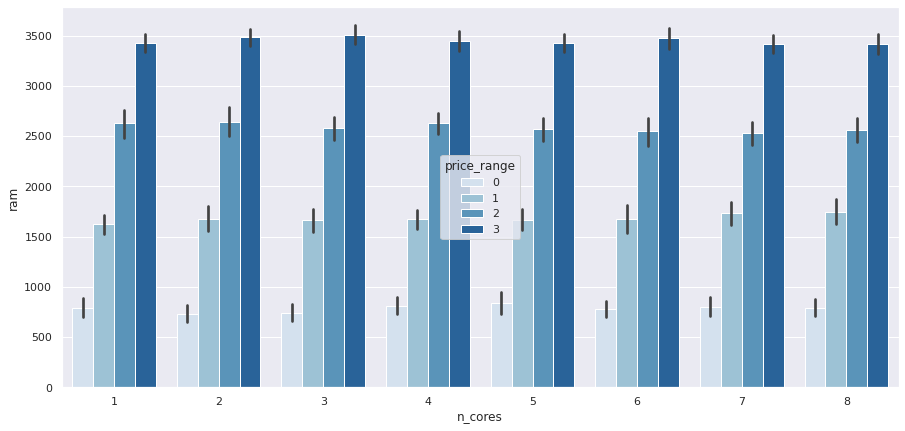

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(15,7))
sns.barplot(x='n_cores', y='ram', hue='price_range', data=df, palette='Blues')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

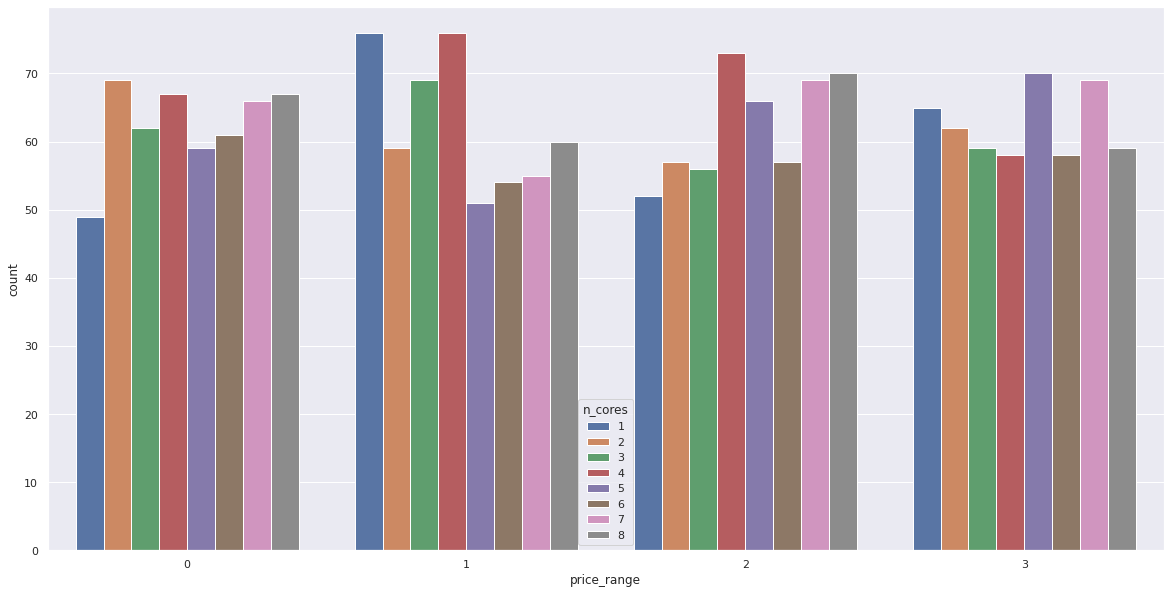

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize = (20,10))
sns.countplot(x='price_range', hue='n_cores', data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

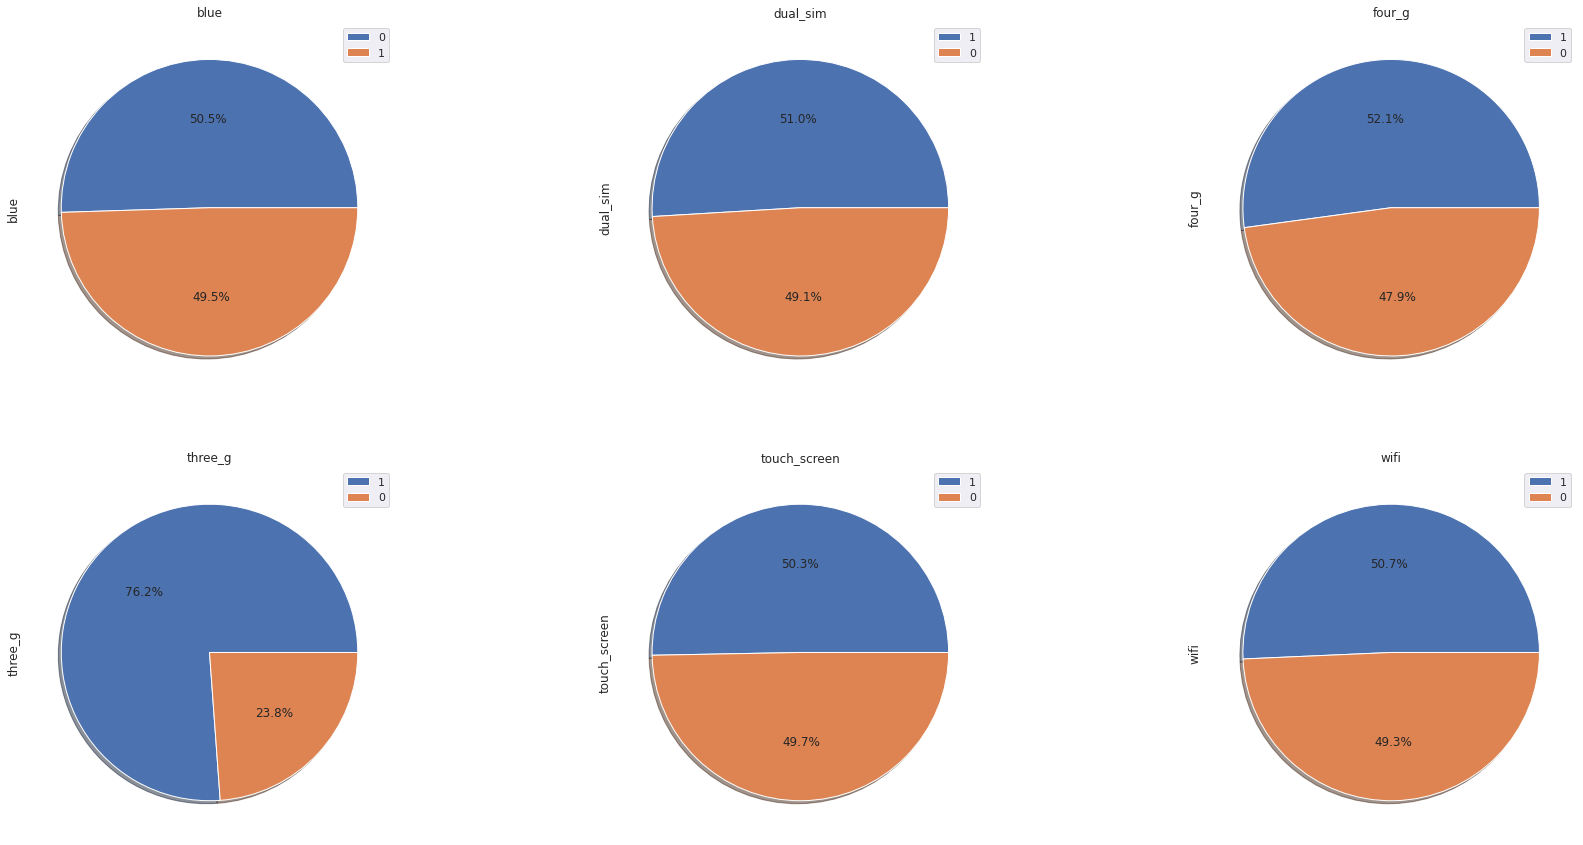

In [ ]:
# Chart - 13 visualization code
category_columns = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
plt.figure(figsize=(30,15))
j=1
for i in category_columns:
  plt.subplot(2, 3, j)
  j+=1
  category_columns[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,labeldistance=None)
  plt.legend()
# plt.ylabel('')
  plt.title(i)

##### 1. Why did you pick the specific chart?

Answer here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

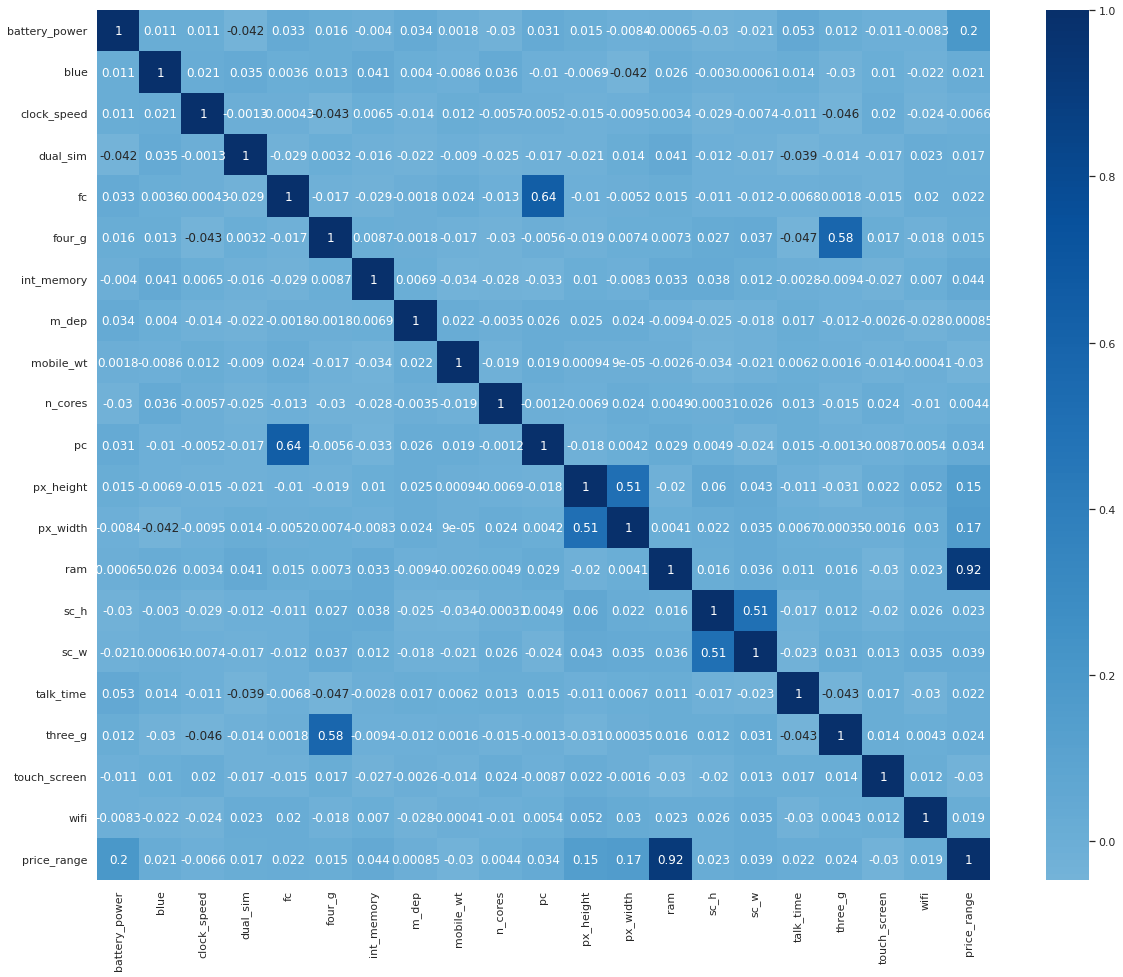

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True, center = 0, cmap='Blues')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

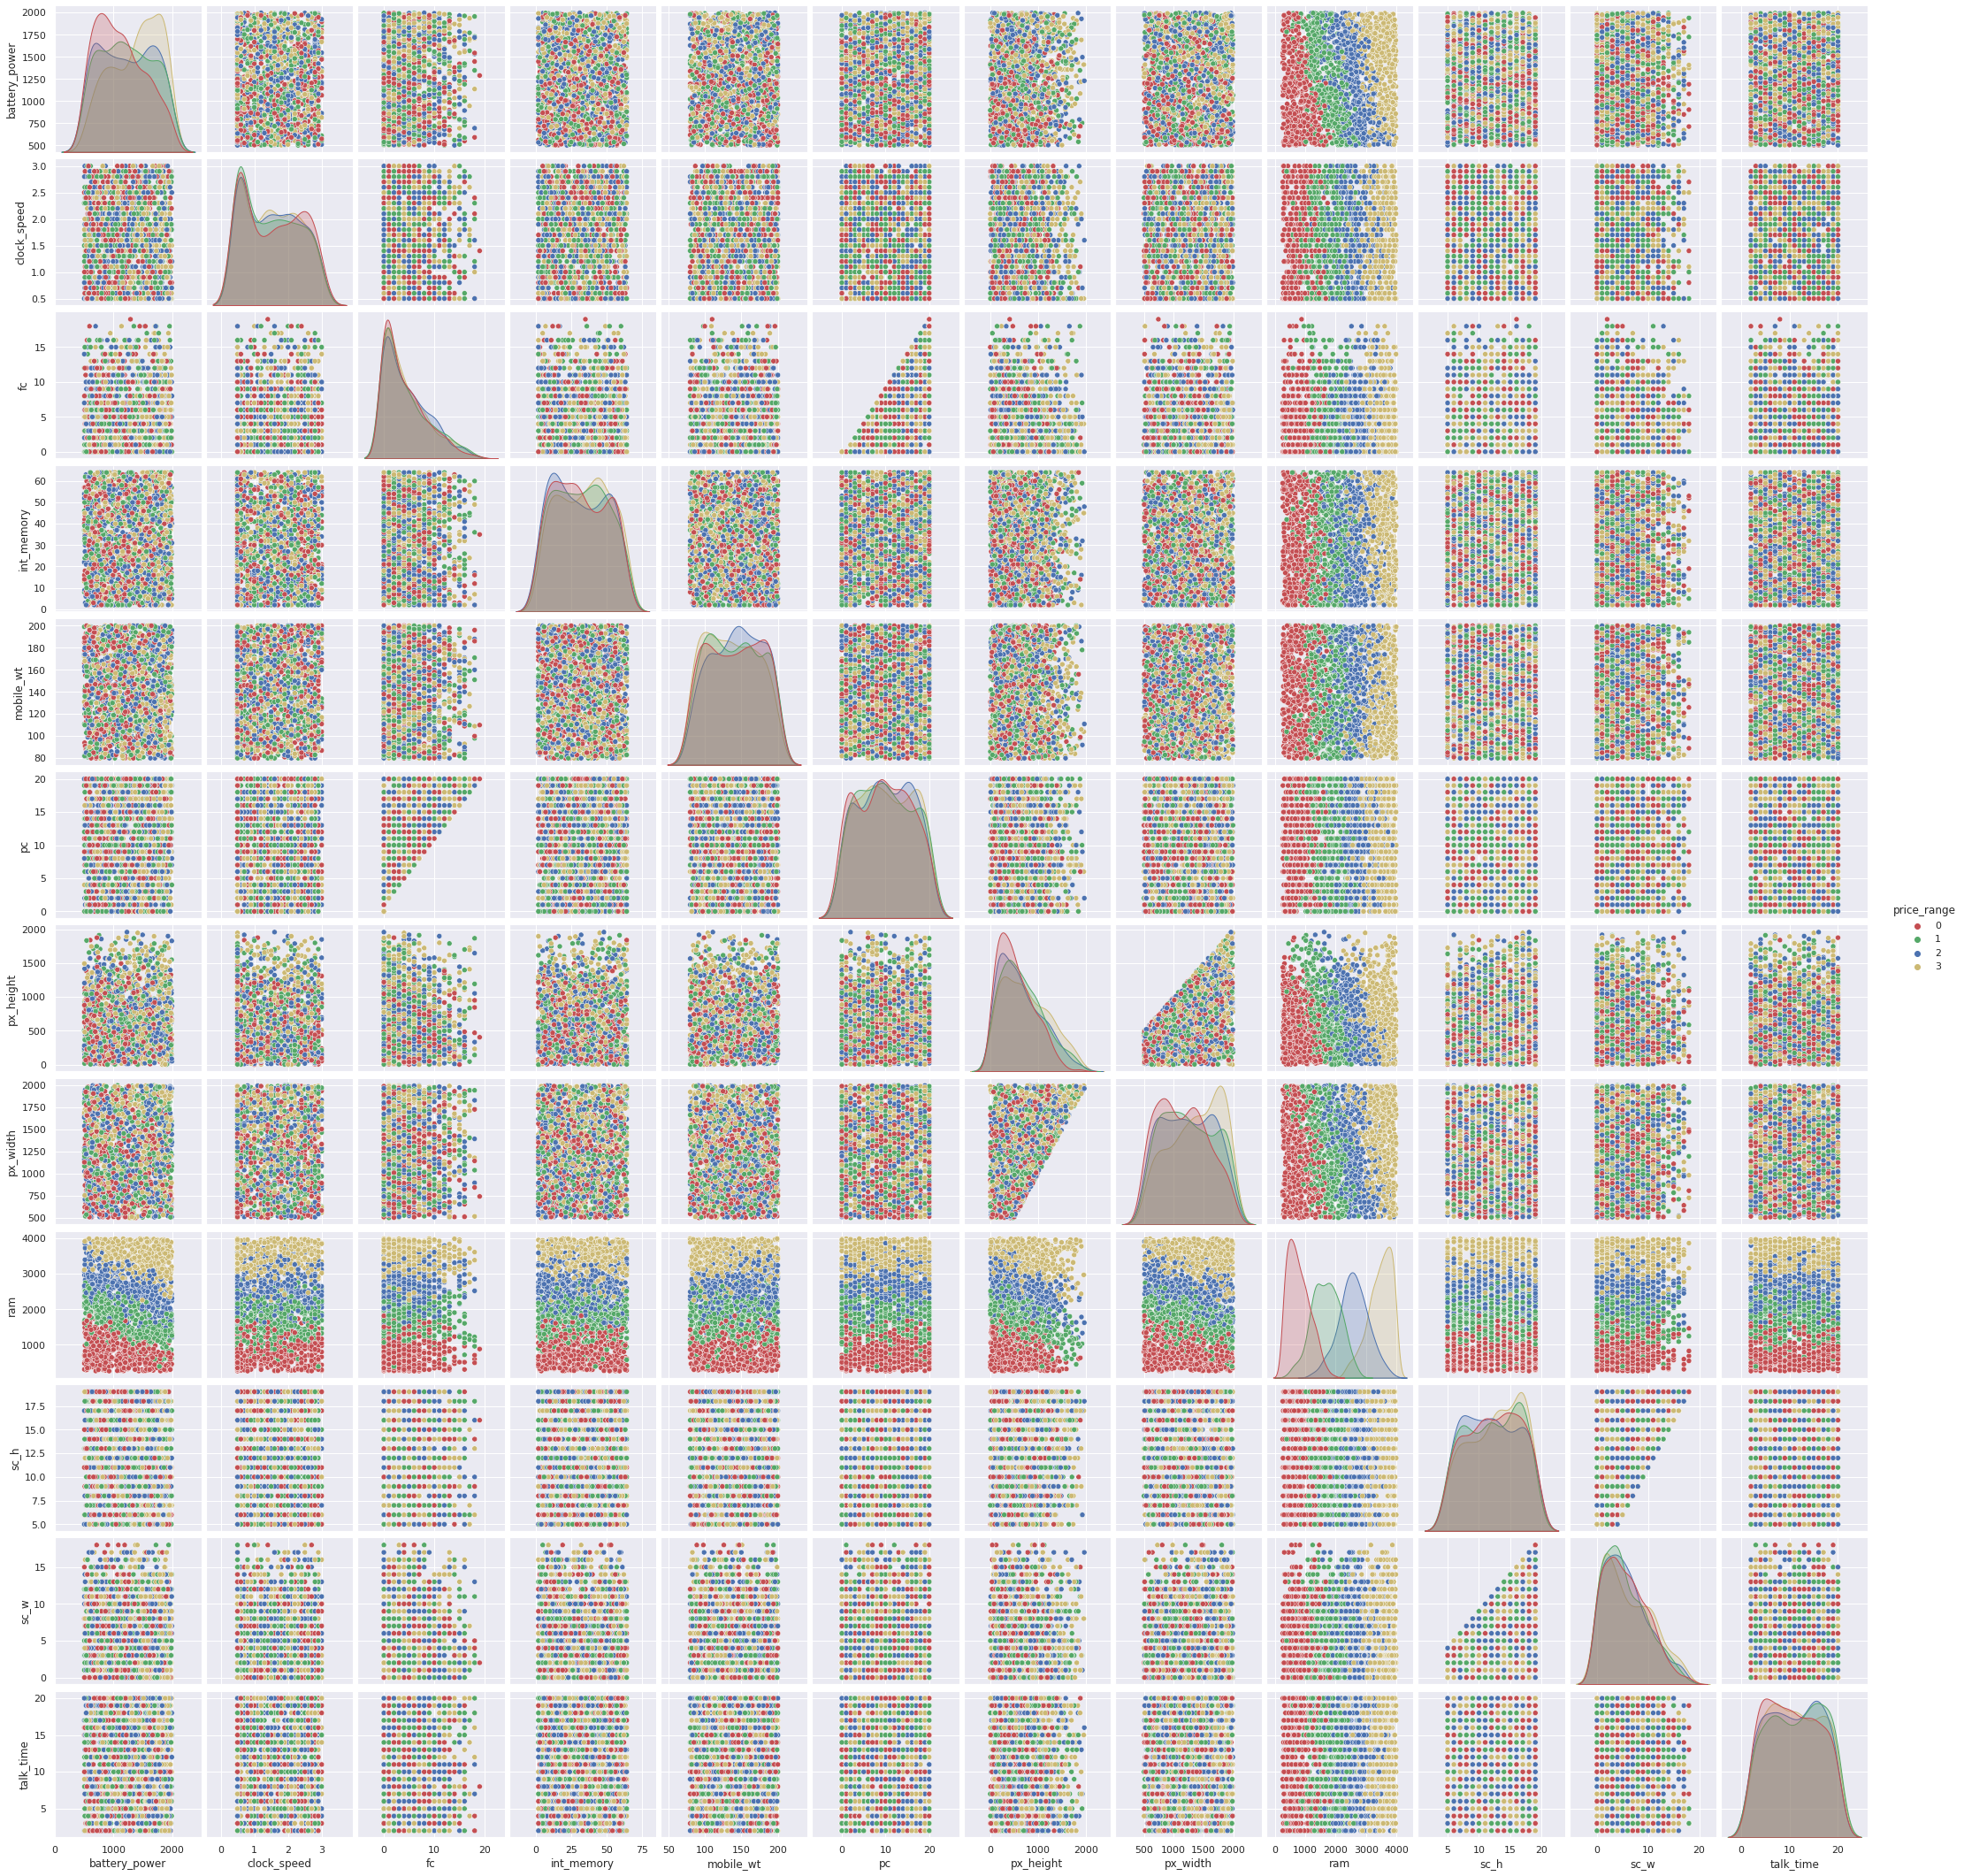

In [ ]:
# Pair Plot visualization code
#Do a pairplot of the variables
df_pair = df[['battery_power', 'clock_speed', 'fc',
       'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','price_range']]
sns.pairplot(df_pair,hue='price_range',palette=['r', 'g', 'b', 'y'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

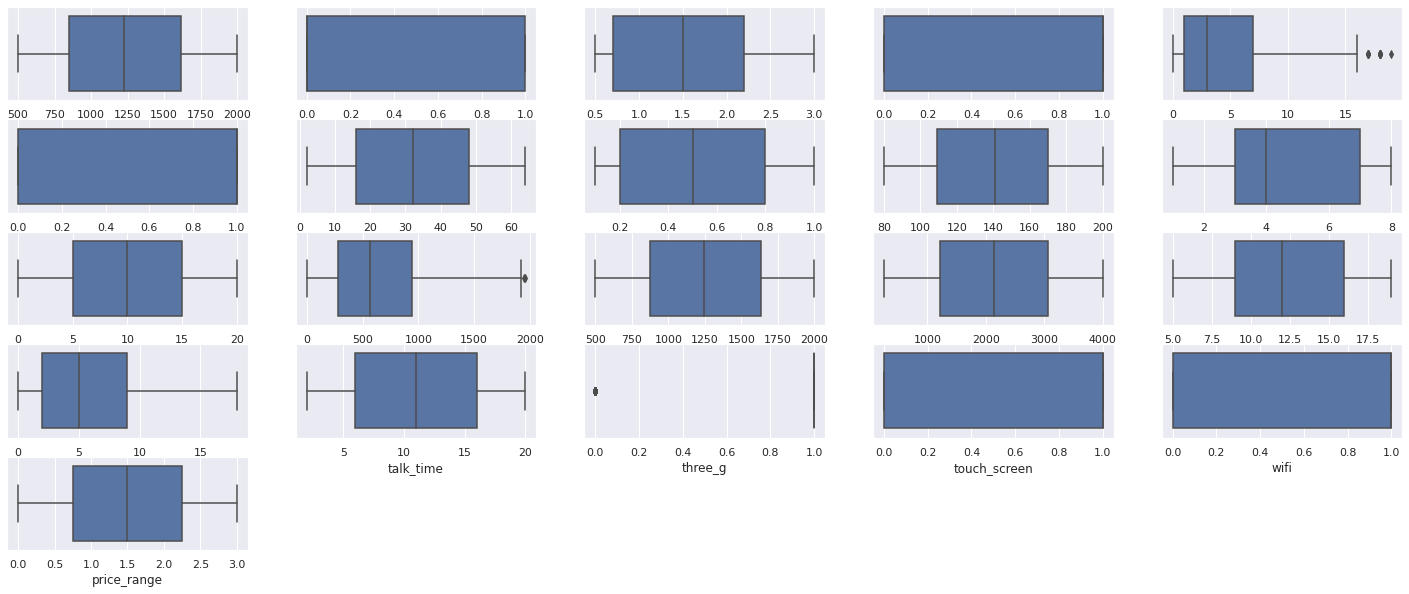

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize = (25,10))
for index, item in enumerate ([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# None

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# All features in our dataset
num_columns

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [ ]:
# Defining Independent vairable and Dependent variable
X = df.drop(['price_range'], axis = 1).values
Y = df['price_range']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
print(X.shape)
Y.shape

(2000, 20)


(2000,)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Scaling

In [ ]:
# Scaling your data
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

##### Which method have you used to scale you data and why?

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20, random_state = 42)

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
logistic_regression = LogisticRegression()
# Fit the Algorithm
logistic_regression.fit(X_train, y_train)
# Predict on the model
y_pred_test = logistic_regression.predict(X_test)
y_pred_train = logistic_regression.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Visualizing evaluation Metric Score chart
# Function for Evaluation Metrics
def evaluation_metrics(model,y_test,y_pred):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred, average='micro')] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred, average='micro')] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred, average='micro')] #F1 Score

    metrics_df = pd.DataFrame(metrics_dict)
    print(metrics_df)

In [ ]:
# Function for confusion_matrix 
def plot_confusion_matrix(model, X_test, y_test, y_pred):
    label = ['1', '0']
    cm = confusion_matrix(y_test, y_pred_test)
    group_names = ['True positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    ax.set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})
    ax.xaxis.set_ticklabels(label)
    ax.yaxis.set_ticklabels(label)
    plt.show()

In [ ]:
# Function for ploting roc curve
def plot_roc_curve(model, X_test, y_test, y_pred):
    plt.figure(figsize = (12,5))
    pred_proba = model.predict_proba(X_test)
    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)     
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)
    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
    plt.legend(loc='best')
    plt.show()

In [ ]:
evaluation_metrics(logistic_regression,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0            0.94       0.94    0.94      0.94


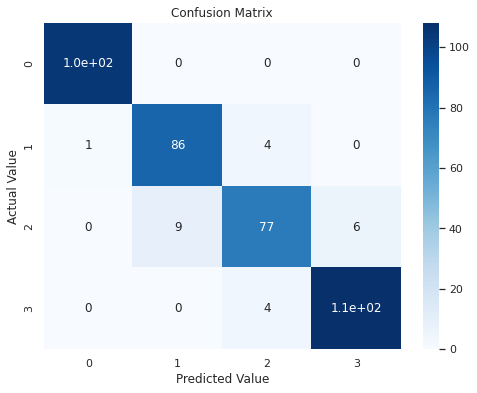

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score,accuracy_score
cf = confusion_matrix(y_test, y_pred_test)

ax = sns.heatmap(cf, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
plt.show()

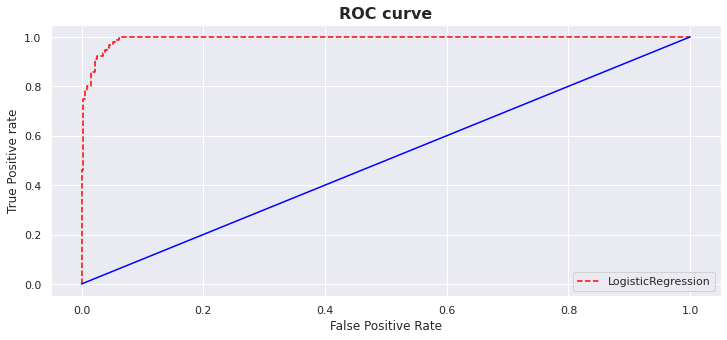

In [ ]:
plot_roc_curve(logistic_regression,X_test,y_test,y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Fit the Algorithm


# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2  DecisionTreeClassifier

In [ ]:
# ML Model - 2 Implementation
DecisionTreeClassifier = DecisionTreeClassifier()
# Fit the Algorithm
DecisionTreeClassifier.fit(X_train, y_train)
# Predict on the model
y_pred_test = DecisionTreeClassifier.predict(X_test)
y_pred_train = DecisionTreeClassifier.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(DecisionTreeClassifier,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0            0.84       0.84    0.84      0.84


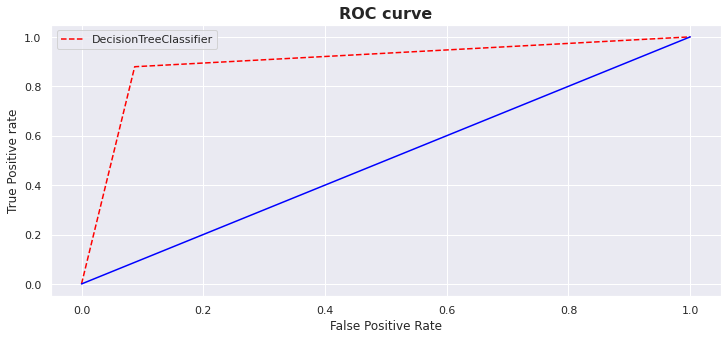

In [ ]:
plot_roc_curve(DecisionTreeClassifier,X_test,y_test,y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeClassifier 
model2_classifier =  DecisionTreeClassifier()
parameters_decision_tree = {"max_depth" : [5,7,9],"min_samples_leaf":[1,3,5],"max_leaf_nodes":[20,40,60],'random_state':[24]}
model2_classifier_CV = GridSearchCV(model2_classifier,param_grid = parameters_decision_tree,cv =3, scoring = 'accuracy')            
# Fit the Algorithm
model2_classifier.fit(X_train, y_train)
# Predict on the model
y_pred_train =  model2_classifier.predict(X_train)
y_pred_test  = model2_classifier.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(model2_classifier,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0            0.83       0.83    0.83      0.83


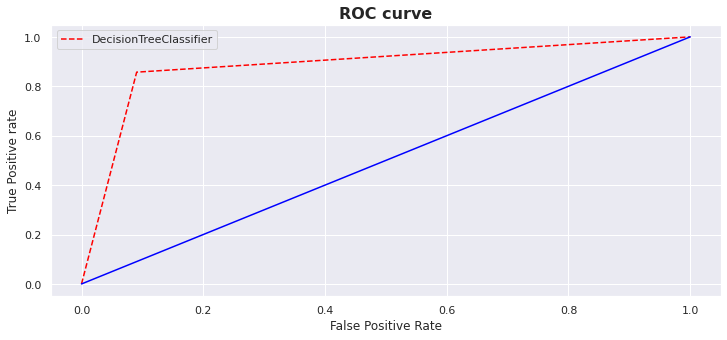

In [ ]:
plot_roc_curve(model2_classifier,X_test,y_test,y_pred_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 RandomForestClassifier

In [ ]:
# ML Model - 3 Implementation (RandomForestClassifier)
model3 = RandomForestClassifier()
# Fit the Algorithm
model3 = model3.fit(X_train,y_train)
# Predict on the model
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(model3,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0          0.8775     0.8775  0.8775    0.8775


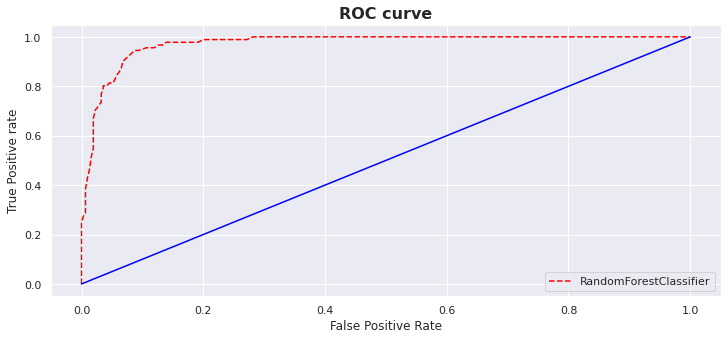

In [ ]:
plot_roc_curve(model3,X_test,y_test,y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning



In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model3_classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50,70,100], "max_depth" : [5,25,50],"min_samples_leaf":[2,10,20],'random_state':[24]}
model3_classifier_CV = GridSearchCV(model3_classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3,verbose=2)
# Fit the Algorithm
model3_classifier_CV.fit(X_train, y_train)
# Predict on the model
y_pred_train =  model3_classifier_CV.best_estimator_.predict(X_train)
y_pred_test  = model3_classifier_CV.best_estimator_.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, n_estimators=50, random_state=24; tota

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(model3_classifier_CV,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0           0.825      0.825   0.825     0.825


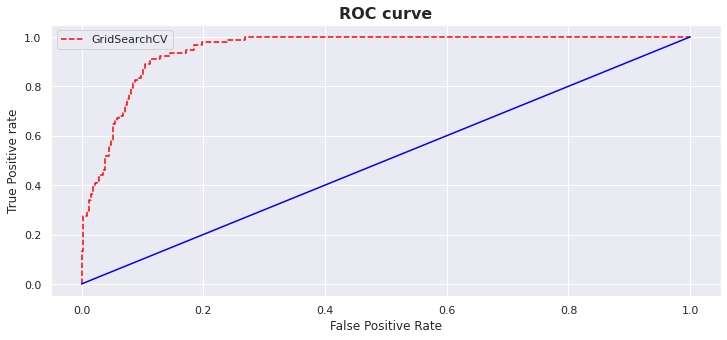

In [ ]:
plot_roc_curve(model3_classifier_CV,X_test,y_test,y_pred_test)

### ML Model - 4 XGBClassifier

In [ ]:
# ML Model - 4 Implementation (RandomForestClassifier)
XGBClassifier = XGBClassifier()
# Fit the Algorithm
XGBClassifier = XGBClassifier.fit(X_train,y_train)
# Predict on the model
y_pred_train = XGBClassifier.predict(X_train)
y_pred_test = XGBClassifier.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(XGBClassifier,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0           0.895      0.895   0.895     0.895


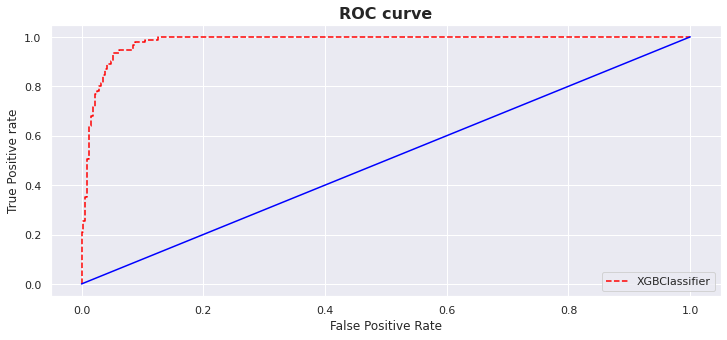

In [ ]:
plot_roc_curve(XGBClassifier,X_test,y_test,y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model4_classifier = RandomForestClassifier() 
grid_value = {'learning_rate':[0.01,0.05],'n_estimators':[50,100],'max_depth':[2,3,4],'scale_pos_weight':[1,3]}
model4_classifier_CV = GridSearchCV(model3_classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3,verbose=2)
# Fit the Algorithm
model4_classifier_CV.fit(X_train, y_train)
# Predict on the model
y_pred_train =  model4_classifier_CV.best_estimator_.predict(X_train)
y_pred_test  = model4_classifier_CV.best_estimator_.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=50, random_state=24; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=70, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, n_estimators=100, random_state=24; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, n_estimators=50, random_state=24; tota

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_metrics(model4_classifier_CV,y_test,y_pred_test)

   Accuracy_Score  Precision  Recall  F1_Score
0           0.825      0.825   0.825     0.825


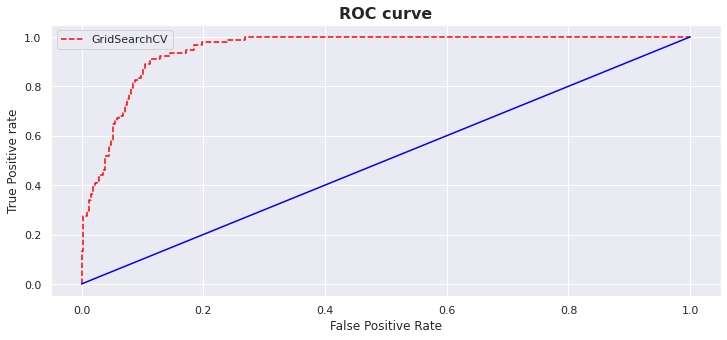

In [ ]:
plot_roc_curve(model3_classifier_CV,X_test,y_test,y_pred_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***